In [1]:
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split # ホールドアウト法に関する関数
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.layers import Convolution, MaxPooling, ReLU, Affine, Dropout, SoftmaxWithLoss
from common.optimizer import RMSProp, SGD, Adam
from common.nn import SimpleConvNet
from common.deep_convnet import DeepConvNet

# ◆学習用データ（手書きカタカナ１５種データ）読み込み<br>
今回のタスクは、手書きのカタカナ15文字（ア〜ソ）を分類するタスクである。<br>
教師あり学習として、学習用データは合計3,000件提供される。<br>
十分な識別精度(98%以上)を出すには、データ拡張が必要であるため、前処理としてデータ拡張（各種変換を実施しながら、3,000件を約60,000件にデータ拡張）を行う事とした（1_preprocessing.ipynb）<br>
<br>
ここでは、前処理で実施したデータ拡張後の学習用データ、及びラベルデータを読み込む。

In [2]:
train_data = np.load("./train_data_mr.npy")
train_label = np.load("./train_label_mr.npy")
print(train_data.shape)
print(train_label.shape)

(14994, 1, 28, 28)
(14994, 15)


# ◆学習用データの分割<br>
今回はデータ拡張で6万件のデータを用意したため、テスト用データの分割はホールドアウト法を用いる。<br>
(データ数が少ない場合は、交差検証法（クロスバリデーション）を用いる。)

In [3]:
test_size = 0.2        # 全データのうち、何%をテストデータにするか（今回は20%に設定）
X_train, X_test, y_train, y_test = train_test_split(train_data, train_label, test_size=test_size, random_state=1234) # ホールドアウト法を実行（テストデータはランダム選択）


# ◆データの正規化<br>
学習を安定させるために、データの正規化を行う。今回はグレースケールの画像データを扱うため、外れ値が発生しづらい。そのため、標準化ではなく正規化で対応する。


In [4]:
# 正規化
X_train = (X_train - X_train.min()) / (X_train.max() - X_train.min())
X_train = X_train.astype('float64')


# ◆CNNモデルによる学習

In [5]:
x = X_train
t = y_train

x = x.reshape(-1,1,28,28) # 配列形式の変換

epochs = 150
batch_size = 100

# オプティマイザは総合的に良い収束をとる場合が多いAdamを採用。
# ハイパーパラメータは原著論文より(https://arxiv.org/abs/1412.6980)
optimizer = Adam(lr=0.001, beta1=0.9, beta2=0.999)


# ミニバッチ毎の繰り返し回数を計算
xsize = x.shape[0]
iter_num = np.ceil(xsize / batch_size).astype(np.int)


# CNNのオブジェクト生成


snet = DeepConvNet()

train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

# 学習実行
for epoch in range(epochs):
    print("epoch=%s"%epoch)

    # シャッフル
    idx = np.arange(xsize)
    np.random.shuffle(idx)

    for it in range(iter_num):
        """
        ランダムなミニバッチを順番に取り出す
        """
        print("it=", it)
        mask = idx[batch_size*it : batch_size*(it+1)]

        # ミニバッチの生成
        x_train = x[mask]
        t_train = t[mask]

        # 勾配の計算 (誤差逆伝播法を用いる) 
        grads = snet.gradient(x_train, t_train)

        # 更新
        optimizer.update(snet.params, grads)

    # 学習経過の記録

    #訓練データにおけるloss
    print("calculating train_loss")    
    train_loss.append(snet.loss(x,  t))

    print("calculating test_loss")
    #テストデータにおけるloss
    test_loss.append(snet.loss(X_test, y_test))

    print("calculating train_accuracy")
    #訓練データにて精度を確認
    train_accuracy.append(snet.accuracy(x, t))
    
    print("calculating test_accuracy")
    #テストデータにて精度を算出
    test_accuracy.append(snet.accuracy(X_test, y_test))

print("train_loss:",train_loss)
print("test_loss:",test_loss)
print("train_accuracy:",train_accuracy)
print("test_accuracy:",test_accuracy)
    
    

#with open( "katakana_model.pickle", "wb") as f:
#    pickle.dump(snet, f)


epoch=0
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
it= 7
it= 8
it= 9
it= 10
it= 11
it= 12
it= 13
it= 14
it= 15
it= 16
it= 17
it= 18
it= 19
it= 20
it= 21
it= 22
it= 23
it= 24
it= 25
it= 26
it= 27
it= 28
it= 29
it= 30
it= 31
it= 32
it= 33
it= 34
it= 35
it= 36
it= 37
it= 38
it= 39
it= 40
it= 41
it= 42
it= 43
it= 44
it= 45
it= 46
it= 47
it= 48
it= 49
it= 50
it= 51
it= 52
it= 53
it= 54
it= 55
it= 56
it= 57
it= 58
it= 59
it= 60
it= 61
it= 62
it= 63
it= 64
it= 65
it= 66
it= 67
it= 68
it= 69
it= 70
it= 71
it= 72
it= 73
it= 74
it= 75
it= 76
it= 77
it= 78
it= 79
it= 80
it= 81
it= 82
it= 83
it= 84
it= 85
it= 86
it= 87
it= 88
it= 89
it= 90
it= 91
it= 92
it= 93
it= 94
it= 95
it= 96
it= 97
it= 98
it= 99
it= 100
it= 101
it= 102
it= 103
it= 104
it= 105
it= 106
it= 107
it= 108
it= 109
it= 110
it= 111
it= 112
it= 113
it= 114
it= 115
it= 116
it= 117
it= 118
it= 119
calculating train_loss
calculating test_loss
calculating train_accuracy
calculating test_accuracy
epoch=1
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5


it= 79
it= 80
it= 81
it= 82
it= 83
it= 84
it= 85
it= 86
it= 87
it= 88
it= 89
it= 90
it= 91
it= 92
it= 93
it= 94
it= 95
it= 96
it= 97
it= 98
it= 99
it= 100
it= 101
it= 102
it= 103
it= 104
it= 105
it= 106
it= 107
it= 108
it= 109
it= 110
it= 111
it= 112
it= 113
it= 114
it= 115
it= 116
it= 117
it= 118
it= 119
calculating train_loss
calculating test_loss
calculating train_accuracy
calculating test_accuracy
epoch=9
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
it= 7
it= 8
it= 9
it= 10
it= 11
it= 12
it= 13
it= 14
it= 15
it= 16
it= 17
it= 18
it= 19
it= 20
it= 21
it= 22
it= 23
it= 24
it= 25
it= 26
it= 27
it= 28
it= 29
it= 30
it= 31
it= 32
it= 33
it= 34
it= 35
it= 36
it= 37
it= 38
it= 39
it= 40
it= 41
it= 42
it= 43
it= 44
it= 45
it= 46
it= 47
it= 48
it= 49
it= 50
it= 51
it= 52
it= 53
it= 54
it= 55
it= 56
it= 57
it= 58
it= 59
it= 60
it= 61
it= 62
it= 63
it= 64
it= 65
it= 66
it= 67
it= 68
it= 69
it= 70
it= 71
it= 72
it= 73
it= 74
it= 75
it= 76
it= 77
it= 78
it= 79
it= 80
it= 81
it= 82
it= 83
it= 84
it

it= 20
it= 21
it= 22
it= 23
it= 24
it= 25
it= 26
it= 27
it= 28
it= 29
it= 30
it= 31
it= 32
it= 33
it= 34
it= 35
it= 36
it= 37
it= 38
it= 39
it= 40
it= 41
it= 42
it= 43
it= 44
it= 45
it= 46
it= 47
it= 48
it= 49
it= 50
it= 51
it= 52
it= 53
it= 54
it= 55
it= 56
it= 57
it= 58
it= 59
it= 60
it= 61
it= 62
it= 63
it= 64
it= 65
it= 66
it= 67
it= 68
it= 69
it= 70
it= 71
it= 72
it= 73
it= 74
it= 75
it= 76
it= 77
it= 78
it= 79
it= 80
it= 81
it= 82
it= 83
it= 84
it= 85
it= 86
it= 87
it= 88
it= 89
it= 90
it= 91
it= 92
it= 93
it= 94
it= 95
it= 96
it= 97
it= 98
it= 99
it= 100
it= 101
it= 102
it= 103
it= 104
it= 105
it= 106
it= 107
it= 108
it= 109
it= 110
it= 111
it= 112
it= 113
it= 114
it= 115
it= 116
it= 117
it= 118
it= 119
calculating train_loss
calculating test_loss
calculating train_accuracy
calculating test_accuracy
epoch=18
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
it= 7
it= 8
it= 9
it= 10
it= 11
it= 12
it= 13
it= 14
it= 15
it= 16
it= 17
it= 18
it= 19
it= 20
it= 21
it= 22
it= 23
it= 24
it= 25
i

it= 97
it= 98
it= 99
it= 100
it= 101
it= 102
it= 103
it= 104
it= 105
it= 106
it= 107
it= 108
it= 109
it= 110
it= 111
it= 112
it= 113
it= 114
it= 115
it= 116
it= 117
it= 118
it= 119
calculating train_loss
calculating test_loss
calculating train_accuracy
calculating test_accuracy
epoch=26
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
it= 7
it= 8
it= 9
it= 10
it= 11
it= 12
it= 13
it= 14
it= 15
it= 16
it= 17
it= 18
it= 19
it= 20
it= 21
it= 22
it= 23
it= 24
it= 25
it= 26
it= 27
it= 28
it= 29
it= 30
it= 31
it= 32
it= 33
it= 34
it= 35
it= 36
it= 37
it= 38
it= 39
it= 40
it= 41
it= 42
it= 43
it= 44
it= 45
it= 46
it= 47
it= 48
it= 49
it= 50
it= 51
it= 52
it= 53
it= 54
it= 55
it= 56
it= 57
it= 58
it= 59
it= 60
it= 61
it= 62
it= 63
it= 64
it= 65
it= 66
it= 67
it= 68
it= 69
it= 70
it= 71
it= 72
it= 73
it= 74
it= 75
it= 76
it= 77
it= 78
it= 79
it= 80
it= 81
it= 82
it= 83
it= 84
it= 85
it= 86
it= 87
it= 88
it= 89
it= 90
it= 91
it= 92
it= 93
it= 94
it= 95
it= 96
it= 97
it= 98
it= 99
it= 100
it= 101
it= 10

it= 37
it= 38
it= 39
it= 40
it= 41
it= 42
it= 43
it= 44
it= 45
it= 46
it= 47
it= 48
it= 49
it= 50
it= 51
it= 52
it= 53
it= 54
it= 55
it= 56
it= 57
it= 58
it= 59
it= 60
it= 61
it= 62
it= 63
it= 64
it= 65
it= 66
it= 67
it= 68
it= 69
it= 70
it= 71
it= 72
it= 73
it= 74
it= 75
it= 76
it= 77
it= 78
it= 79
it= 80
it= 81
it= 82
it= 83
it= 84
it= 85
it= 86
it= 87
it= 88
it= 89
it= 90
it= 91
it= 92
it= 93
it= 94
it= 95
it= 96
it= 97
it= 98
it= 99
it= 100
it= 101
it= 102
it= 103
it= 104
it= 105
it= 106
it= 107
it= 108
it= 109
it= 110
it= 111
it= 112
it= 113
it= 114
it= 115
it= 116
it= 117
it= 118
it= 119
calculating train_loss
calculating test_loss
calculating train_accuracy
calculating test_accuracy
epoch=35
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
it= 7
it= 8
it= 9
it= 10
it= 11
it= 12
it= 13
it= 14
it= 15
it= 16
it= 17
it= 18
it= 19
it= 20
it= 21
it= 22
it= 23
it= 24
it= 25
it= 26
it= 27
it= 28
it= 29
it= 30
it= 31
it= 32
it= 33
it= 34
it= 35
it= 36
it= 37
it= 38
it= 39
it= 40
it= 41
it= 42
i

it= 112
it= 113
it= 114
it= 115
it= 116
it= 117
it= 118
it= 119
calculating train_loss
calculating test_loss
calculating train_accuracy
calculating test_accuracy
epoch=43
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
it= 7
it= 8
it= 9
it= 10
it= 11
it= 12
it= 13
it= 14
it= 15
it= 16
it= 17
it= 18
it= 19
it= 20
it= 21
it= 22
it= 23
it= 24
it= 25
it= 26
it= 27
it= 28
it= 29
it= 30
it= 31
it= 32
it= 33
it= 34
it= 35
it= 36
it= 37
it= 38
it= 39
it= 40
it= 41
it= 42
it= 43
it= 44
it= 45
it= 46
it= 47
it= 48
it= 49
it= 50
it= 51
it= 52
it= 53
it= 54
it= 55
it= 56
it= 57
it= 58
it= 59
it= 60
it= 61
it= 62
it= 63
it= 64
it= 65
it= 66
it= 67
it= 68
it= 69
it= 70
it= 71
it= 72
it= 73
it= 74
it= 75
it= 76
it= 77
it= 78
it= 79
it= 80
it= 81
it= 82
it= 83
it= 84
it= 85
it= 86
it= 87
it= 88
it= 89
it= 90
it= 91
it= 92
it= 93
it= 94
it= 95
it= 96
it= 97
it= 98
it= 99
it= 100
it= 101
it= 102
it= 103
it= 104
it= 105
it= 106
it= 107
it= 108
it= 109
it= 110
it= 111
it= 112
it= 113
it= 114
it= 115
it= 116
it=

it= 54
it= 55
it= 56
it= 57
it= 58
it= 59
it= 60
it= 61
it= 62
it= 63
it= 64
it= 65
it= 66
it= 67
it= 68
it= 69
it= 70
it= 71
it= 72
it= 73
it= 74
it= 75
it= 76
it= 77
it= 78
it= 79
it= 80
it= 81
it= 82
it= 83
it= 84
it= 85
it= 86
it= 87
it= 88
it= 89
it= 90
it= 91
it= 92
it= 93
it= 94
it= 95
it= 96
it= 97
it= 98
it= 99
it= 100
it= 101
it= 102
it= 103
it= 104
it= 105
it= 106
it= 107
it= 108
it= 109
it= 110
it= 111
it= 112
it= 113
it= 114
it= 115
it= 116
it= 117
it= 118
it= 119
calculating train_loss
calculating test_loss
calculating train_accuracy
calculating test_accuracy
epoch=52
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
it= 7
it= 8
it= 9
it= 10
it= 11
it= 12
it= 13
it= 14
it= 15
it= 16
it= 17
it= 18
it= 19
it= 20
it= 21
it= 22
it= 23
it= 24
it= 25
it= 26
it= 27
it= 28
it= 29
it= 30
it= 31
it= 32
it= 33
it= 34
it= 35
it= 36
it= 37
it= 38
it= 39
it= 40
it= 41
it= 42
it= 43
it= 44
it= 45
it= 46
it= 47
it= 48
it= 49
it= 50
it= 51
it= 52
it= 53
it= 54
it= 55
it= 56
it= 57
it= 58
it= 59
i

calculating test_accuracy
epoch=60
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
it= 7
it= 8
it= 9
it= 10
it= 11
it= 12
it= 13
it= 14
it= 15
it= 16
it= 17
it= 18
it= 19
it= 20
it= 21
it= 22
it= 23
it= 24
it= 25
it= 26
it= 27
it= 28
it= 29
it= 30
it= 31
it= 32
it= 33
it= 34
it= 35
it= 36
it= 37
it= 38
it= 39
it= 40
it= 41
it= 42
it= 43
it= 44
it= 45
it= 46
it= 47
it= 48
it= 49
it= 50
it= 51
it= 52
it= 53
it= 54
it= 55
it= 56
it= 57
it= 58
it= 59
it= 60
it= 61
it= 62
it= 63
it= 64
it= 65
it= 66
it= 67
it= 68
it= 69
it= 70
it= 71
it= 72
it= 73
it= 74
it= 75
it= 76
it= 77
it= 78
it= 79
it= 80
it= 81
it= 82
it= 83
it= 84
it= 85
it= 86
it= 87
it= 88
it= 89
it= 90
it= 91
it= 92
it= 93
it= 94
it= 95
it= 96
it= 97
it= 98
it= 99
it= 100
it= 101
it= 102
it= 103
it= 104
it= 105
it= 106
it= 107
it= 108
it= 109
it= 110
it= 111
it= 112
it= 113
it= 114
it= 115
it= 116
it= 117
it= 118
it= 119
calculating train_loss
calculating test_loss
calculating train_accuracy
calculating test_accuracy
epoch=61
it= 0
it

it= 74
it= 75
it= 76
it= 77
it= 78
it= 79
it= 80
it= 81
it= 82
it= 83
it= 84
it= 85
it= 86
it= 87
it= 88
it= 89
it= 90
it= 91
it= 92
it= 93
it= 94
it= 95
it= 96
it= 97
it= 98
it= 99
it= 100
it= 101
it= 102
it= 103
it= 104
it= 105
it= 106
it= 107
it= 108
it= 109
it= 110
it= 111
it= 112
it= 113
it= 114
it= 115
it= 116
it= 117
it= 118
it= 119
calculating train_loss
calculating test_loss
calculating train_accuracy
calculating test_accuracy
epoch=69
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
it= 7
it= 8
it= 9
it= 10
it= 11
it= 12
it= 13
it= 14
it= 15
it= 16
it= 17
it= 18
it= 19
it= 20
it= 21
it= 22
it= 23
it= 24
it= 25
it= 26
it= 27
it= 28
it= 29
it= 30
it= 31
it= 32
it= 33
it= 34
it= 35
it= 36
it= 37
it= 38
it= 39
it= 40
it= 41
it= 42
it= 43
it= 44
it= 45
it= 46
it= 47
it= 48
it= 49
it= 50
it= 51
it= 52
it= 53
it= 54
it= 55
it= 56
it= 57
it= 58
it= 59
it= 60
it= 61
it= 62
it= 63
it= 64
it= 65
it= 66
it= 67
it= 68
it= 69
it= 70
it= 71
it= 72
it= 73
it= 74
it= 75
it= 76
it= 77
it= 78
it= 79
i

it= 14
it= 15
it= 16
it= 17
it= 18
it= 19
it= 20
it= 21
it= 22
it= 23
it= 24
it= 25
it= 26
it= 27
it= 28
it= 29
it= 30
it= 31
it= 32
it= 33
it= 34
it= 35
it= 36
it= 37
it= 38
it= 39
it= 40
it= 41
it= 42
it= 43
it= 44
it= 45
it= 46
it= 47
it= 48
it= 49
it= 50
it= 51
it= 52
it= 53
it= 54
it= 55
it= 56
it= 57
it= 58
it= 59
it= 60
it= 61
it= 62
it= 63
it= 64
it= 65
it= 66
it= 67
it= 68
it= 69
it= 70
it= 71
it= 72
it= 73
it= 74
it= 75
it= 76
it= 77
it= 78
it= 79
it= 80
it= 81
it= 82
it= 83
it= 84
it= 85
it= 86
it= 87
it= 88
it= 89
it= 90
it= 91
it= 92
it= 93
it= 94
it= 95
it= 96
it= 97
it= 98
it= 99
it= 100
it= 101
it= 102
it= 103
it= 104
it= 105
it= 106
it= 107
it= 108
it= 109
it= 110
it= 111
it= 112
it= 113
it= 114
it= 115
it= 116
it= 117
it= 118
it= 119
calculating train_loss
calculating test_loss
calculating train_accuracy
calculating test_accuracy
epoch=78
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
it= 7
it= 8
it= 9
it= 10
it= 11
it= 12
it= 13
it= 14
it= 15
it= 16
it= 17
it= 18
it= 19
i

it= 91
it= 92
it= 93
it= 94
it= 95
it= 96
it= 97
it= 98
it= 99
it= 100
it= 101
it= 102
it= 103
it= 104
it= 105
it= 106
it= 107
it= 108
it= 109
it= 110
it= 111
it= 112
it= 113
it= 114
it= 115
it= 116
it= 117
it= 118
it= 119
calculating train_loss
calculating test_loss
calculating train_accuracy
calculating test_accuracy
epoch=86
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
it= 7
it= 8
it= 9
it= 10
it= 11
it= 12
it= 13
it= 14
it= 15
it= 16
it= 17
it= 18
it= 19
it= 20
it= 21
it= 22
it= 23
it= 24
it= 25
it= 26
it= 27
it= 28
it= 29
it= 30
it= 31
it= 32
it= 33
it= 34
it= 35
it= 36
it= 37
it= 38
it= 39
it= 40
it= 41
it= 42
it= 43
it= 44
it= 45
it= 46
it= 47
it= 48
it= 49
it= 50
it= 51
it= 52
it= 53
it= 54
it= 55
it= 56
it= 57
it= 58
it= 59
it= 60
it= 61
it= 62
it= 63
it= 64
it= 65
it= 66
it= 67
it= 68
it= 69
it= 70
it= 71
it= 72
it= 73
it= 74
it= 75
it= 76
it= 77
it= 78
it= 79
it= 80
it= 81
it= 82
it= 83
it= 84
it= 85
it= 86
it= 87
it= 88
it= 89
it= 90
it= 91
it= 92
it= 93
it= 94
it= 95
it= 96
i

it= 31
it= 32
it= 33
it= 34
it= 35
it= 36
it= 37
it= 38
it= 39
it= 40
it= 41
it= 42
it= 43
it= 44
it= 45
it= 46
it= 47
it= 48
it= 49
it= 50
it= 51
it= 52
it= 53
it= 54
it= 55
it= 56
it= 57
it= 58
it= 59
it= 60
it= 61
it= 62
it= 63
it= 64
it= 65
it= 66
it= 67
it= 68
it= 69
it= 70
it= 71
it= 72
it= 73
it= 74
it= 75
it= 76
it= 77
it= 78
it= 79
it= 80
it= 81
it= 82
it= 83
it= 84
it= 85
it= 86
it= 87
it= 88
it= 89
it= 90
it= 91
it= 92
it= 93
it= 94
it= 95
it= 96
it= 97
it= 98
it= 99
it= 100
it= 101
it= 102
it= 103
it= 104
it= 105
it= 106
it= 107
it= 108
it= 109
it= 110
it= 111
it= 112
it= 113
it= 114
it= 115
it= 116
it= 117
it= 118
it= 119
calculating train_loss
calculating test_loss
calculating train_accuracy
calculating test_accuracy
epoch=95
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
it= 7
it= 8
it= 9
it= 10
it= 11
it= 12
it= 13
it= 14
it= 15
it= 16
it= 17
it= 18
it= 19
it= 20
it= 21
it= 22
it= 23
it= 24
it= 25
it= 26
it= 27
it= 28
it= 29
it= 30
it= 31
it= 32
it= 33
it= 34
it= 35
it= 36
i

it= 107
it= 108
it= 109
it= 110
it= 111
it= 112
it= 113
it= 114
it= 115
it= 116
it= 117
it= 118
it= 119
calculating train_loss
calculating test_loss
calculating train_accuracy
calculating test_accuracy
epoch=103
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
it= 7
it= 8
it= 9
it= 10
it= 11
it= 12
it= 13
it= 14
it= 15
it= 16
it= 17
it= 18
it= 19
it= 20
it= 21
it= 22
it= 23
it= 24
it= 25
it= 26
it= 27
it= 28
it= 29
it= 30
it= 31
it= 32
it= 33
it= 34
it= 35
it= 36
it= 37
it= 38
it= 39
it= 40
it= 41
it= 42
it= 43
it= 44
it= 45
it= 46
it= 47
it= 48
it= 49
it= 50
it= 51
it= 52
it= 53
it= 54
it= 55
it= 56
it= 57
it= 58
it= 59
it= 60
it= 61
it= 62
it= 63
it= 64
it= 65
it= 66
it= 67
it= 68
it= 69
it= 70
it= 71
it= 72
it= 73
it= 74
it= 75
it= 76
it= 77
it= 78
it= 79
it= 80
it= 81
it= 82
it= 83
it= 84
it= 85
it= 86
it= 87
it= 88
it= 89
it= 90
it= 91
it= 92
it= 93
it= 94
it= 95
it= 96
it= 97
it= 98
it= 99
it= 100
it= 101
it= 102
it= 103
it= 104
it= 105
it= 106
it= 107
it= 108
it= 109
it= 110
it= 111
it

it= 47
it= 48
it= 49
it= 50
it= 51
it= 52
it= 53
it= 54
it= 55
it= 56
it= 57
it= 58
it= 59
it= 60
it= 61
it= 62
it= 63
it= 64
it= 65
it= 66
it= 67
it= 68
it= 69
it= 70
it= 71
it= 72
it= 73
it= 74
it= 75
it= 76
it= 77
it= 78
it= 79
it= 80
it= 81
it= 82
it= 83
it= 84
it= 85
it= 86
it= 87
it= 88
it= 89
it= 90
it= 91
it= 92
it= 93
it= 94
it= 95
it= 96
it= 97
it= 98
it= 99
it= 100
it= 101
it= 102
it= 103
it= 104
it= 105
it= 106
it= 107
it= 108
it= 109
it= 110
it= 111
it= 112
it= 113
it= 114
it= 115
it= 116
it= 117
it= 118
it= 119
calculating train_loss
calculating test_loss
calculating train_accuracy
calculating test_accuracy
epoch=112
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
it= 7
it= 8
it= 9
it= 10
it= 11
it= 12
it= 13
it= 14
it= 15
it= 16
it= 17
it= 18
it= 19
it= 20
it= 21
it= 22
it= 23
it= 24
it= 25
it= 26
it= 27
it= 28
it= 29
it= 30
it= 31
it= 32
it= 33
it= 34
it= 35
it= 36
it= 37
it= 38
it= 39
it= 40
it= 41
it= 42
it= 43
it= 44
it= 45
it= 46
it= 47
it= 48
it= 49
it= 50
it= 51
it= 52


calculating train_loss
calculating test_loss
calculating train_accuracy
calculating test_accuracy
epoch=120
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
it= 7
it= 8
it= 9
it= 10
it= 11
it= 12
it= 13
it= 14
it= 15
it= 16
it= 17
it= 18
it= 19
it= 20
it= 21
it= 22
it= 23
it= 24
it= 25
it= 26
it= 27
it= 28
it= 29
it= 30
it= 31
it= 32
it= 33
it= 34
it= 35
it= 36
it= 37
it= 38
it= 39
it= 40
it= 41
it= 42
it= 43
it= 44
it= 45
it= 46
it= 47
it= 48
it= 49
it= 50
it= 51
it= 52
it= 53
it= 54
it= 55
it= 56
it= 57
it= 58
it= 59
it= 60
it= 61
it= 62
it= 63
it= 64
it= 65
it= 66
it= 67
it= 68
it= 69
it= 70
it= 71
it= 72
it= 73
it= 74
it= 75
it= 76
it= 77
it= 78
it= 79
it= 80
it= 81
it= 82
it= 83
it= 84
it= 85
it= 86
it= 87
it= 88
it= 89
it= 90
it= 91
it= 92
it= 93
it= 94
it= 95
it= 96
it= 97
it= 98
it= 99
it= 100
it= 101
it= 102
it= 103
it= 104
it= 105
it= 106
it= 107
it= 108
it= 109
it= 110
it= 111
it= 112
it= 113
it= 114
it= 115
it= 116
it= 117
it= 118
it= 119
calculating train_loss
calculating test_lo

it= 62
it= 63
it= 64
it= 65
it= 66
it= 67
it= 68
it= 69
it= 70
it= 71
it= 72
it= 73
it= 74
it= 75
it= 76
it= 77
it= 78
it= 79
it= 80
it= 81
it= 82
it= 83
it= 84
it= 85
it= 86
it= 87
it= 88
it= 89
it= 90
it= 91
it= 92
it= 93
it= 94
it= 95
it= 96
it= 97
it= 98
it= 99
it= 100
it= 101
it= 102
it= 103
it= 104
it= 105
it= 106
it= 107
it= 108
it= 109
it= 110
it= 111
it= 112
it= 113
it= 114
it= 115
it= 116
it= 117
it= 118
it= 119
calculating train_loss
calculating test_loss
calculating train_accuracy
calculating test_accuracy
epoch=129
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
it= 7
it= 8
it= 9
it= 10
it= 11
it= 12
it= 13
it= 14
it= 15
it= 16
it= 17
it= 18
it= 19
it= 20
it= 21
it= 22
it= 23
it= 24
it= 25
it= 26
it= 27
it= 28
it= 29
it= 30
it= 31
it= 32
it= 33
it= 34
it= 35
it= 36
it= 37
it= 38
it= 39
it= 40
it= 41
it= 42
it= 43
it= 44
it= 45
it= 46
it= 47
it= 48
it= 49
it= 50
it= 51
it= 52
it= 53
it= 54
it= 55
it= 56
it= 57
it= 58
it= 59
it= 60
it= 61
it= 62
it= 63
it= 64
it= 65
it= 66
it= 67


it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
it= 7
it= 8
it= 9
it= 10
it= 11
it= 12
it= 13
it= 14
it= 15
it= 16
it= 17
it= 18
it= 19
it= 20
it= 21
it= 22
it= 23
it= 24
it= 25
it= 26
it= 27
it= 28
it= 29
it= 30
it= 31
it= 32
it= 33
it= 34
it= 35
it= 36
it= 37
it= 38
it= 39
it= 40
it= 41
it= 42
it= 43
it= 44
it= 45
it= 46
it= 47
it= 48
it= 49
it= 50
it= 51
it= 52
it= 53
it= 54
it= 55
it= 56
it= 57
it= 58
it= 59
it= 60
it= 61
it= 62
it= 63
it= 64
it= 65
it= 66
it= 67
it= 68
it= 69
it= 70
it= 71
it= 72
it= 73
it= 74
it= 75
it= 76
it= 77
it= 78
it= 79
it= 80
it= 81
it= 82
it= 83
it= 84
it= 85
it= 86
it= 87
it= 88
it= 89
it= 90
it= 91
it= 92
it= 93
it= 94
it= 95
it= 96
it= 97
it= 98
it= 99
it= 100
it= 101
it= 102
it= 103
it= 104
it= 105
it= 106
it= 107
it= 108
it= 109
it= 110
it= 111
it= 112
it= 113
it= 114
it= 115
it= 116
it= 117
it= 118
it= 119
calculating train_loss
calculating test_loss
calculating train_accuracy
calculating test_accuracy
epoch=138
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
it= 7


it= 78
it= 79
it= 80
it= 81
it= 82
it= 83
it= 84
it= 85
it= 86
it= 87
it= 88
it= 89
it= 90
it= 91
it= 92
it= 93
it= 94
it= 95
it= 96
it= 97
it= 98
it= 99
it= 100
it= 101
it= 102
it= 103
it= 104
it= 105
it= 106
it= 107
it= 108
it= 109
it= 110
it= 111
it= 112
it= 113
it= 114
it= 115
it= 116
it= 117
it= 118
it= 119
calculating train_loss
calculating test_loss
calculating train_accuracy
calculating test_accuracy
epoch=146
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
it= 7
it= 8
it= 9
it= 10
it= 11
it= 12
it= 13
it= 14
it= 15
it= 16
it= 17
it= 18
it= 19
it= 20
it= 21
it= 22
it= 23
it= 24
it= 25
it= 26
it= 27
it= 28
it= 29
it= 30
it= 31
it= 32
it= 33
it= 34
it= 35
it= 36
it= 37
it= 38
it= 39
it= 40
it= 41
it= 42
it= 43
it= 44
it= 45
it= 46
it= 47
it= 48
it= 49
it= 50
it= 51
it= 52
it= 53
it= 54
it= 55
it= 56
it= 57
it= 58
it= 59
it= 60
it= 61
it= 62
it= 63
it= 64
it= 65
it= 66
it= 67
it= 68
it= 69
it= 70
it= 71
it= 72
it= 73
it= 74
it= 75
it= 76
it= 77
it= 78
it= 79
it= 80
it= 81
it= 82
it= 83


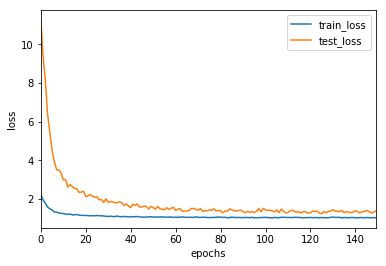

In [6]:
#loss, accuracyのグラフ化
df_log = pd.DataFrame({"train_loss":train_loss,
             "test_loss":test_loss})
df_log.plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.show()

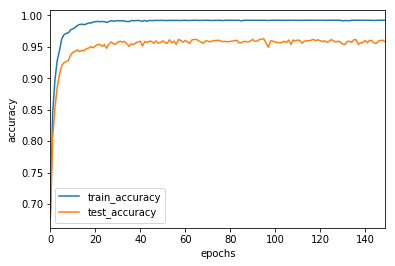

In [7]:
#loss, accuracyのグラフ化
df_log = pd.DataFrame({
             "train_accuracy":train_accuracy,
             "test_accuracy":test_accuracy})
df_log.plot()
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.show()

In [8]:
print(max(test_accuracy))

0.962320773591197


In [9]:
##学習済みモデルの保存

snet.save_params("deep_convnet_params.pkl")
print("Saved Network Parameters!")

Saved Network Parameters!
